In [2]:
from Obstacle import *
from Visualization import *
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from Utils.Node import *
import math

wheel_radius = 0.038
wheel_distance = 0.354

In [3]:
obs = Obstacle(0.0)
viz = Visualization(obs)

In [4]:
# fig, ax = plt.subplots()
# ax.set(xlim=(0, 10), ylim = (0,10))
# obs = Obstacle(0.0)
# viz = Visualization(obs)
# ax = viz.addObstacles2Map(ax)
# ax.set_aspect("equal")
# # plt.show()

In [5]:
def toRadian(angle):
    return np.pi * angle / 180
def toDegree(angle):
    return 180 * angle / np.pi

In [6]:
def getBranches(node, T, w1, w2, goal_state, obs):
    actions=[[w1, w1], [w2, w2], [w1, 0], [0, w1], [w1, w2], [w2, w1]]
    state = node.getState()
    branches = []

    for action in actions:
        new_state, path_array = move(state, action, T, obs)
        if new_state is not None:
            branch_node = Node(new_state, node, action, 0, path_array)
            branches.append(branch_node)

    #remove None nodes
    # b = [branch for branch in branches if branch.getState() is not None]        
    return branches



In [7]:
def move(state, action, T, obs):
    t = 0
    dt = 0.1

    Xi, Yi, thetai = state
    thetai = toRadian(thetai)

    wL, wR = action

    Xn = Xi
    Yn = Yi
    thetan = thetai

    path_array = []
    while t<T:
        t = t + dt
        Xn += 0.5 * wheel_radius * (wL + wR) * math.cos(thetan) * dt
        Yn += 0.5 * wheel_radius * (wL + wR) * math.sin(thetan) * dt
        thetan += (wheel_radius / wheel_distance) * (wL - wR) * dt
        path_array.append([Xn, Yn])
        
        if obs.isInObstacleSpace(Xn, Yn):
            return None, None
        
    thetan = toDegree(thetan)
    return [Xn, Yn, thetan] , path_array

In [20]:
node = Node([4, 2, 0], None, None, None, None)
branches = getBranches(node, 1, 5, 10, None, obs)

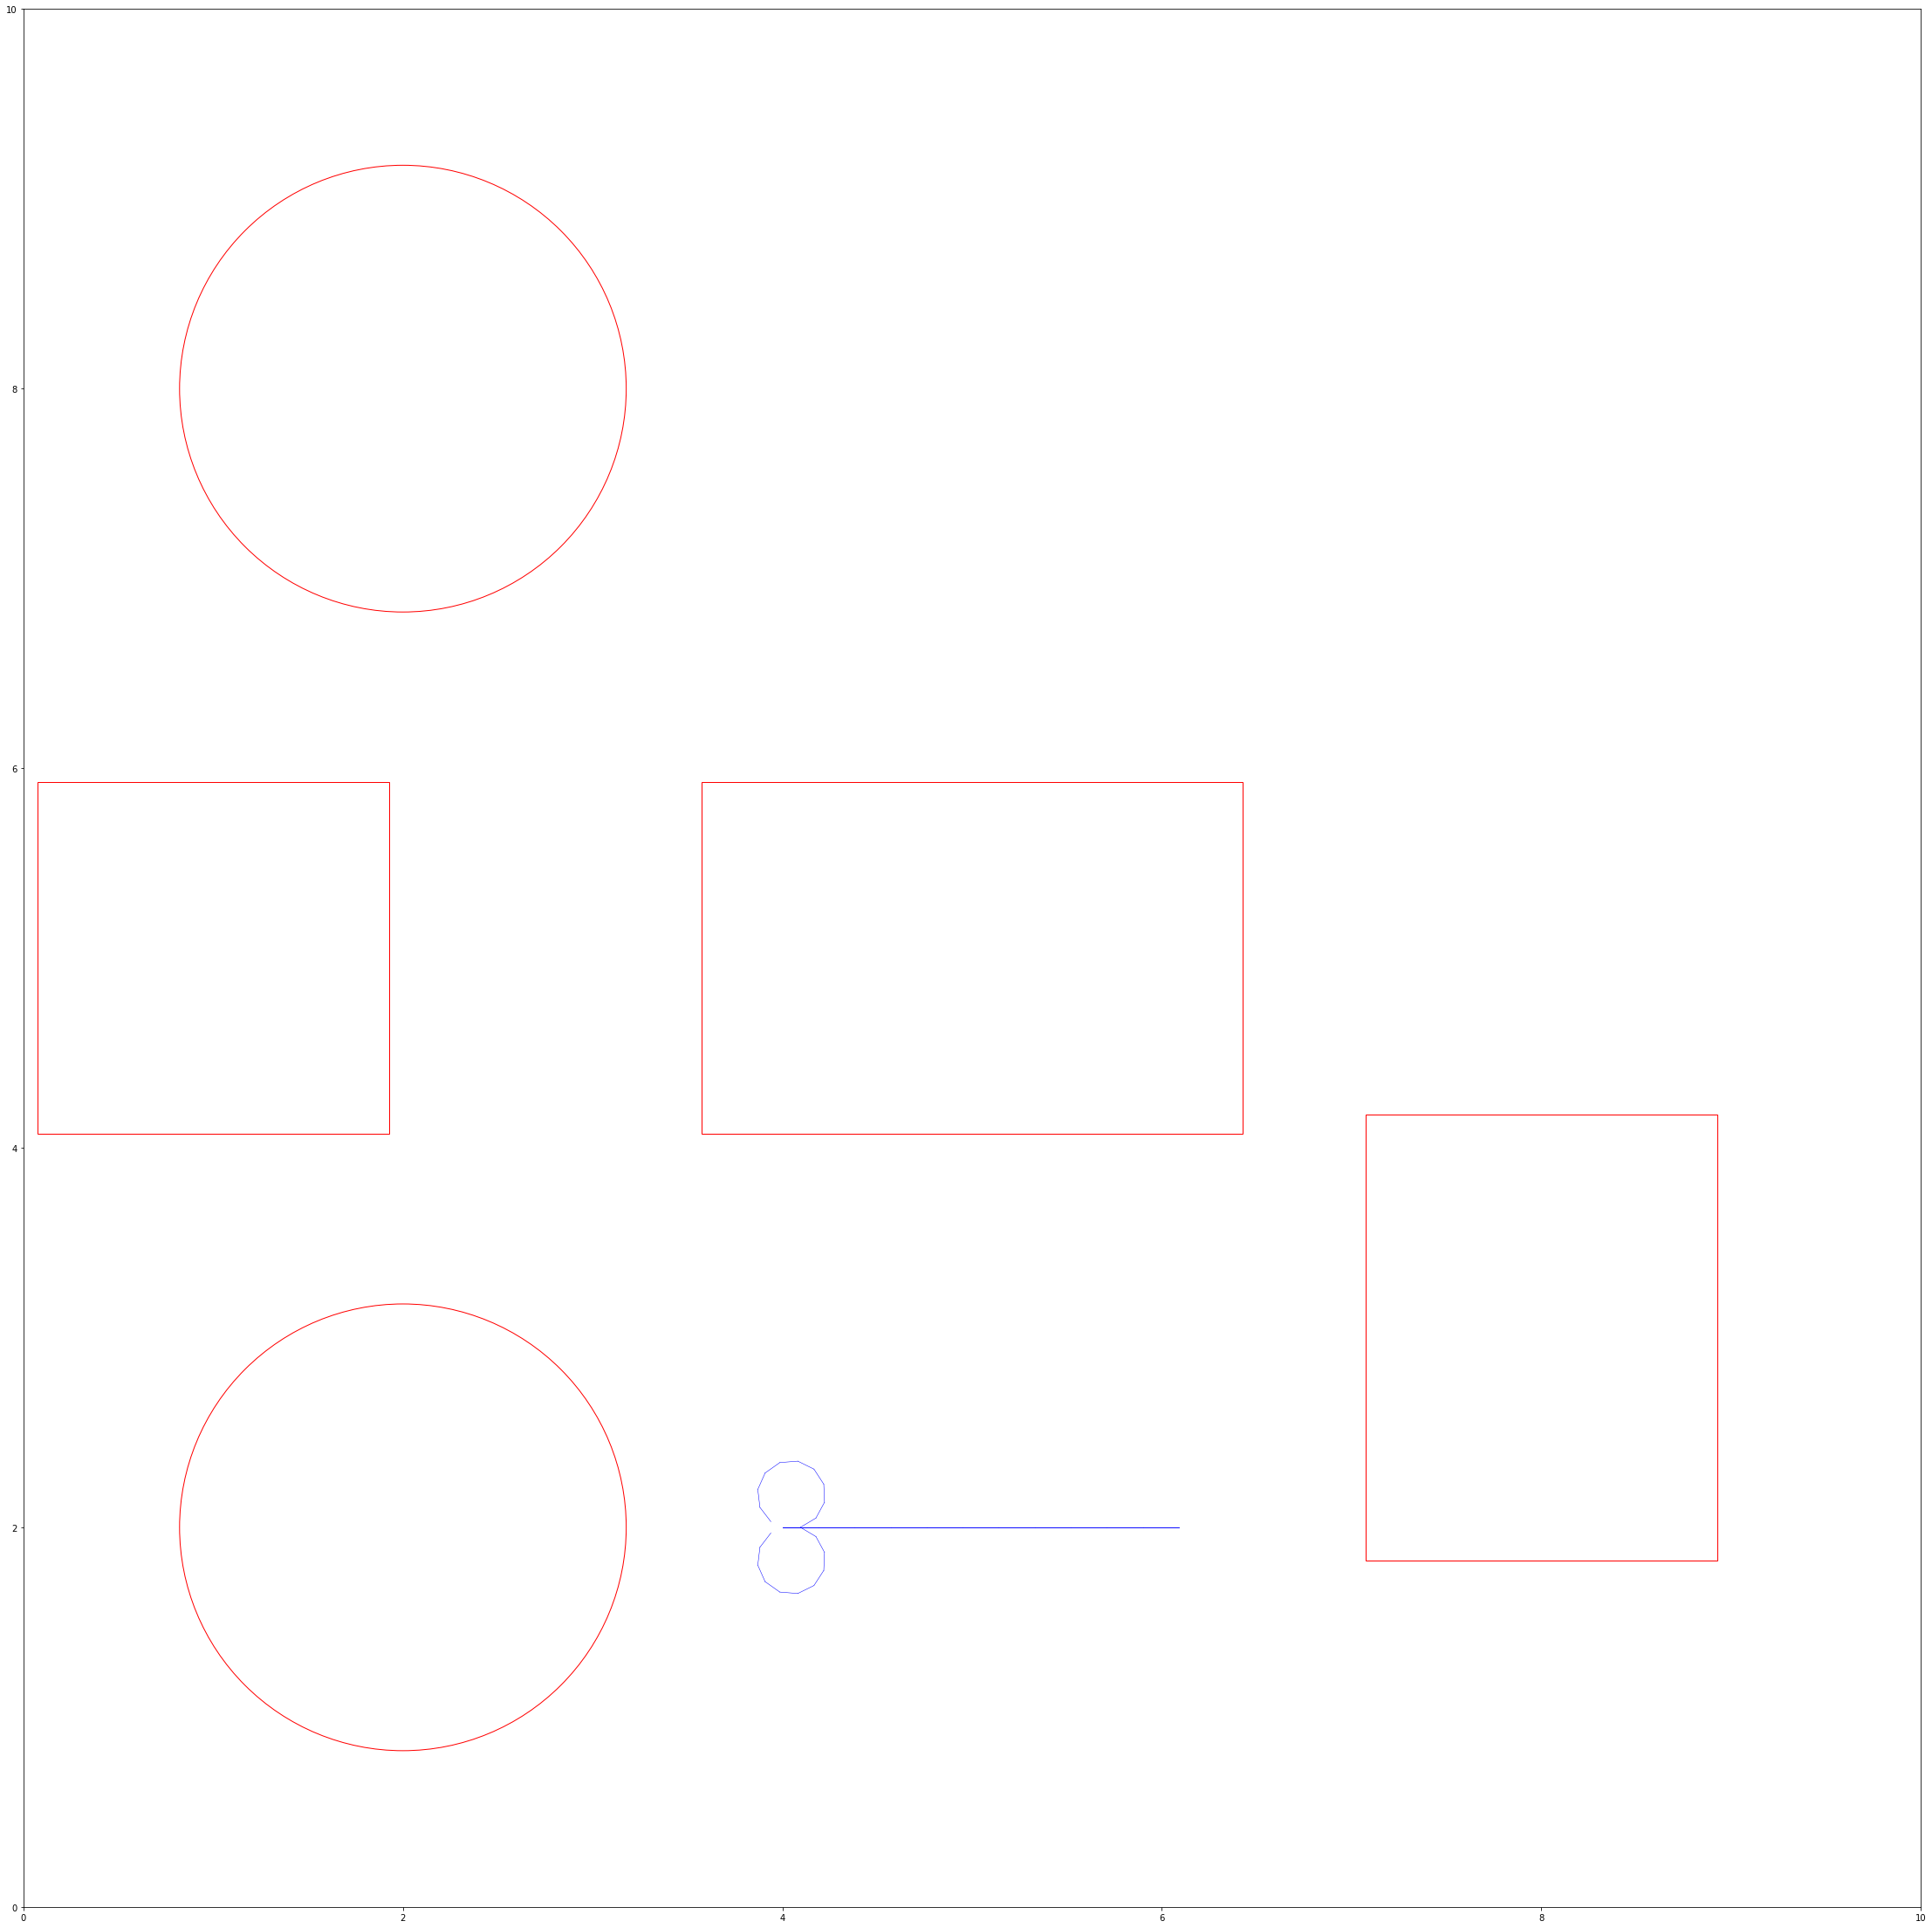

In [21]:
fig, ax = plt.subplots(figsize = (40, 40))
ax.set(xlim=(0, 10), ylim = (0,10))
ax = viz.addObstacles2Map(ax)
ax.set_aspect("equal")
for branch in branches:
    xi, yi, _ = branch.getParent().getState()
    points = branch.getPathArray()
    for point in points:
        xn, yn = point
        ax.plot([xi, xn], [yi, yn], color="blue", linewidth = 0.5 )
        xi, yi = xn, yn

    

In [94]:
plt.show()